In [1]:
'''
Author: Bright NZ 109766140@qq.com
Date: 2022-08-24 13:36:27
LastEditors: Bright NZ 109766140@qq.com
LastEditTime: 2022-08-26 10:09:43
FilePath: \project3\CarPricePrediction.ipynb
Description: 这是默认设置,请设置`customMade`, 打开koroFileHeader查看配置 进行设置: https://github.com/OBKoro1/koro1FileHeader/wiki/%E9%85%8D%E7%BD%AE
'''
#importing the  dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import statsmodels.api as sm
import tensorflow.python.keras

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense


In [2]:
df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')
print ("list data briefly")
df.head()

list data briefly


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
df.info

<bound method DataFrame.info of        Customer Name                                    Customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

    Country  Gender  Age  Annual Salary  Credit Card Debt    Net Wo

In [4]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
df.shape

(500, 9)

In [6]:
df["Customer Name"].unique()

array(['Martina Avila', 'Harlan Barnes', 'Naomi Rodriquez',
       'Jade Cunningham', 'Cedric Leach', 'Carla Hester',
       'Griffin Rivera', 'Orli Casey', 'Marny Obrien', 'Rhonda Chavez',
       'Jerome Rowe', 'Akeem Gibson', 'Quin Smith', 'Tatum Moon',
       'Sharon Sharpe', 'Thomas Williams', 'Blaine Bender',
       'Stephen Lindsey', 'Sloane Mann', 'Athena Wolf', 'Blythe Romero',
       'Zelenia Byers', 'Nola Wiggins', 'Micah Wheeler', 'Caryn Hendrix',
       'Hedda Miranda', 'Ulric Lynn', 'Alma Pope', 'Gemma Hendrix',
       'Castor Wood', 'Herman Stevenson', 'Adrienne Bolton',
       'Dahlia Cleveland', 'Keane Browning', 'Quon Hull', 'Coby Charles',
       'Amery Cortez', 'Uriel Bradshaw', 'Fredericka Sanders',
       'Christopher Stevens', 'Rachel Ashley', 'Lael Wright',
       'Ryder Shaffer', 'Eric Noel', 'Tamara Guy', 'Quincy Bell',
       'Lee Taylor', 'Kenneth Pope', 'Reese Vance', 'Quon Carroll',
       'Magee Davidson', 'Leilani Gross', 'Morgan William',
       'Frances

In [7]:
df.shape

(500, 9)

In [8]:
df["Gender"].unique()

array([0, 1], dtype=int64)

In [9]:
df["Age"].unique()

array([42, 41, 43, 58, 57, 47, 50, 53, 44, 48, 55, 45, 52, 59, 46, 40, 28,
       56, 33, 51, 22, 38, 39, 61, 37, 34, 32, 49, 36, 30, 35, 54, 62, 60,
       63, 70, 64, 65, 29, 27, 31, 20, 25], dtype=int64)

In [10]:
df["Annual Salary"].unique()

array([ 62812.09301,  66646.89292,  53798.55112,  79370.03798,
        59729.1513 ,  68499.85162,  39814.522  ,  51752.23445,
        58139.2591 ,  53457.10132,  73348.70745,  55421.65733,
        37336.3383 ,  68304.47298,  72776.00382,  64662.30061,
        63259.87837,  52682.06401,  54503.14423,  55368.23716,
        63435.86304,  64347.34531,  65176.69055,  52027.63837,
        69612.0123 ,  53065.57175,  82842.53385,  61388.62709,
       100000.     ,  62891.86556,  39627.1248 ,  68859.56489,
        82358.22683,  67904.39895,  65311.68225,  59593.2624 ,
        47460.54809,  43131.78411,  52263.69806,  80959.5331 ,
        66417.66597,  58457.41492,  50571.45969,  50943.16256,
        79792.13096,  70787.27764,  56098.50773,  57478.37922,
        60181.40633,  74445.08168,  38406.7789 ,  64616.6881 ,
        68107.93144,  72471.81532,  35069.41886,  52422.94691,
        84467.78988,  51419.50777,  46609.51626,  55207.45679,
        46689.4159 ,  71847.2544 ,  69236.68608,  54006

In [11]:
df["Credit Card Debt"].unique()

array([11609.38091  ,  9572.957136 , 11160.35506  , 14426.16485  ,
        5358.712177 , 14179.47244  ,  5958.460188 , 10985.69656  ,
        3440.823799 , 12884.07868  ,  8270.707359 , 10014.96929  ,
       10218.32092  ,  9466.995128 , 10597.63814  , 11326.03434  ,
       11495.54999  , 12514.52029  ,  7377.820914 , 13272.94647  ,
       11878.03779  , 10905.36628  ,  7698.552234 , 11960.85377  ,
        8125.598993 , 17805.57607  , 13102.15805  , 14270.00731  ,
       17452.92179  , 12522.94052  ,  9371.511071 , 13417.02027  ,
        8092.475103 , 11417.30952  ,  7988.753685 , 12252.73058  ,
        7405.534271 , 10917.14094  ,  8838.759509 ,  4499.921096 ,
        9183.327621 , 12491.01273  , 13338.32852  , 10816.8855   ,
       14245.53319  , 10155.34095  , 11675.28496  ,  2230.096344 ,
        7094.896557 ,  7915.758178 , 11023.00268  , 12378.54089  ,
        7813.602657 , 11216.88676  ,  1851.979839 ,  6998.46562  ,
        7772.444847 , 11331.20447  ,  7592.019748 ,  9976.4348

In [12]:
df["Net Worth"].unique()

array([ 238961.2505 ,  530973.9078 ,  638467.1773 ,  548599.0524 ,
        560304.0671 ,  428485.3604 ,  326373.1812 ,  629312.4041 ,
        630059.0274 ,  476643.3544 ,  612738.6171 ,  293862.5123 ,
        430907.1673 ,  420322.0702 ,  146344.8965 ,  481433.4324 ,
        370356.2223 ,  549443.5886 ,  431098.9998 ,  566022.1306 ,
        480588.2345 ,  307226.0977 ,  497526.4566 ,  688466.0503 ,
        499086.3442 ,  429440.3297 ,  315775.3207 ,  341691.9337 ,
        188032.0778 ,  583230.976  ,  319837.6593 ,  486069.073  ,
        655934.4666 ,  487435.964  ,  215673.5384 ,  612242.7755 ,
        430624.8142 ,  326742.7352 ,  213040.9606 ,  379749.9152 ,
        513340.0097 ,  410655.9947 ,  348833.8403 ,  299734.1278 ,
        497950.2933 ,  853913.8532 ,  320228.6451 ,  158979.7102 ,
        390312.1715 ,  527420.7269 ,  451846.1995 ,  779925.7892 ,
        455609.1429 ,  583523.0762 ,  353757.5057 ,  438067.7506 ,
        468238.7915 ,  636407.1148 ,  409419.5797 ,  286062.51

In [13]:
df["Car Purchase Amount"].unique()

array([35321.45877, 45115.52566, 42925.70921, 67422.36313, 55915.46248,
       56611.99784, 28925.70549, 47434.98265, 48013.6141 , 38189.50601,
       59045.51309, 42288.81046, 28700.0334 , 49258.87571, 49510.03356,
       53017.26723, 41814.72067, 43901.71244, 44633.99241, 54827.52403,
       51130.95379, 43402.31525, 47240.86004, 46635.49432, 45078.40193,
       44387.58412, 37161.55393, 49091.97185, 58350.31809, 43994.35972,
       17584.56963, 44650.36073, 66363.89316, 53489.46214, 39810.34817,
       51612.14311, 38978.67458, 10092.22509, 35928.52404, 54823.19221,
       45805.67186, 41567.47033, 28031.20985, 27815.73813, 68678.4352 ,
       68925.09447, 34215.7615 , 37843.46619, 37883.24231, 48734.35708,
       27187.23914, 63738.39065, 48266.75516, 46381.13111, 31978.9799 ,
       48100.29052, 47380.91224, 41425.00116, 38147.81018, 32737.80177,
       37348.13737, 47483.85316, 49730.53339, 40093.61981, 42297.5062 ,
       52954.93121, 48104.11184, 43680.91327, 52707.96816, 49392

In [14]:
backup=df.copy()

In [15]:
df=df[df["Car Purchase Amount"]<6e6].reset_index(drop=True)
df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [16]:
df=df[df["Car Purchase Amount"]<6e6].reset_index(drop=True)
df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [17]:
df.info

<bound method DataFrame.info of        Customer Name                                    Customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

    Country  Gender  Age  Annual Salary  Credit Card Debt    Net Wo

In [18]:
#save cleaned data
df.to_csv("cleanData.csv")

In [19]:
df=pd.read_csv("cleanData.csv")
df.head()

,Unnamed: 0,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [20]:
# calculate the correlation coefficient
cor=df.corr()
cor

,Unnamed: 0,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Unnamed: 0,1.000000,-0.056220,-0.043316,0.066113,-0.098042,-0.024259,-0.000527
Gender,-0.056220,1.000000,-0.066488,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.043316,-0.066488,1.000000,0.000361,0.031748,0.021794,0.633273
Annual Salary,0.066113,-0.036499,0.000361,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,-0.098042,0.024193,0.031748,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.024259,-0.008395,0.021794,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.000527,-0.066408,0.633273,0.617862,0.028882,0.488580,1.000000


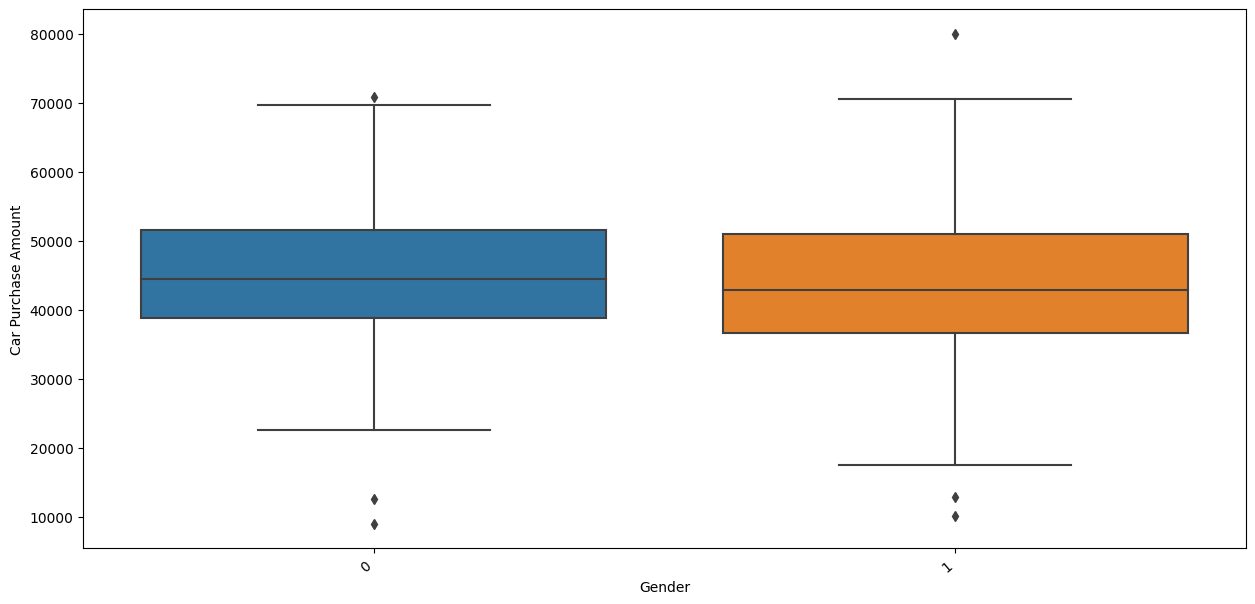

In [21]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Gender',y='Car Purchase Amount',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [22]:
'''
Author: Bright NZ 109766140@qq.com
Date: 2022-08-24 13:36:27
LastEditors: Bright NZ 109766140@qq.com
LastEditTime: 2022-08-31 13:26:34
FilePath: \project3\CarPricePrediction.ipynb
Description: 这是默认设置,请设置`customMade`, 打开koroFileHeader查看配置 进行设置: https://github.com/OBKoro1/koro1FileHeader/wiki/%E9%85%8D%E7%BD%AE
'''
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Age',y='Car Purchase Amount',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

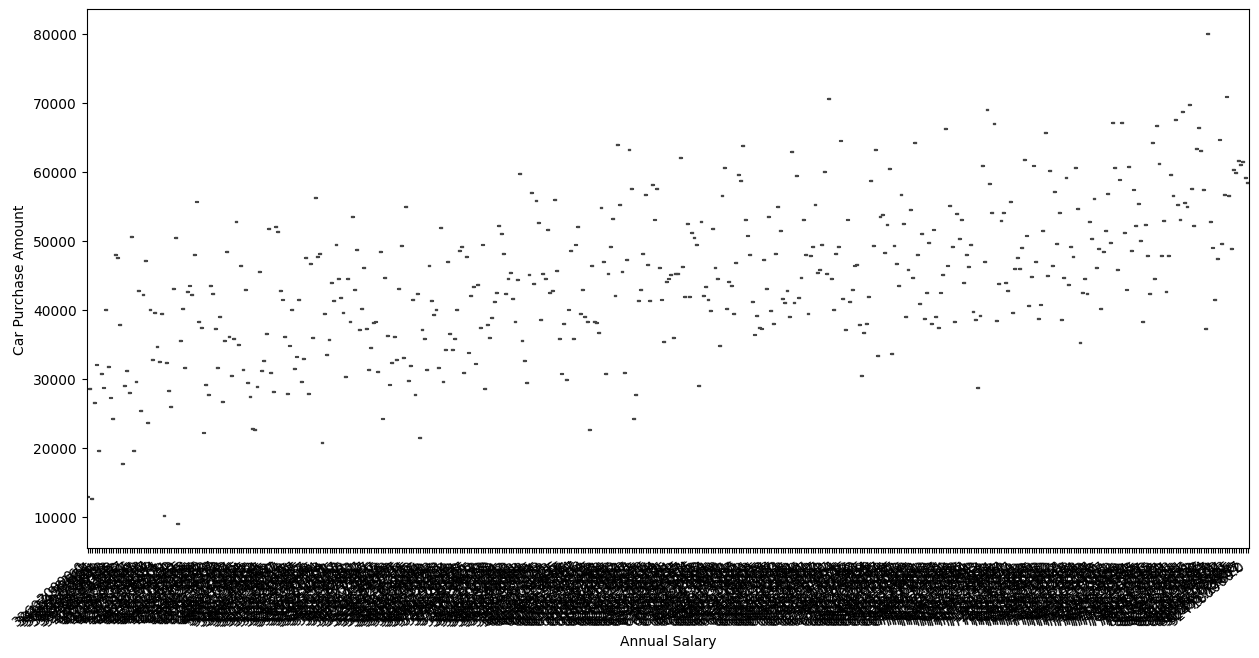

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Annual Salary',y='Car Purchase Amount',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

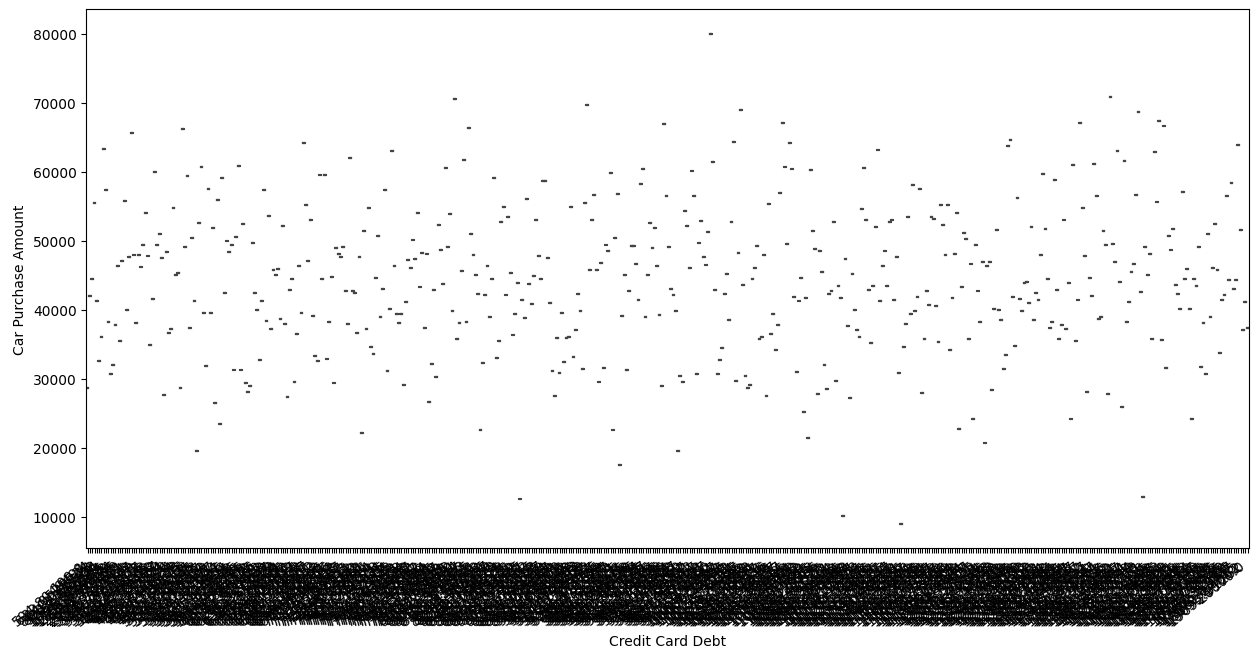

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Credit Card Debt',y='Car Purchase Amount',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

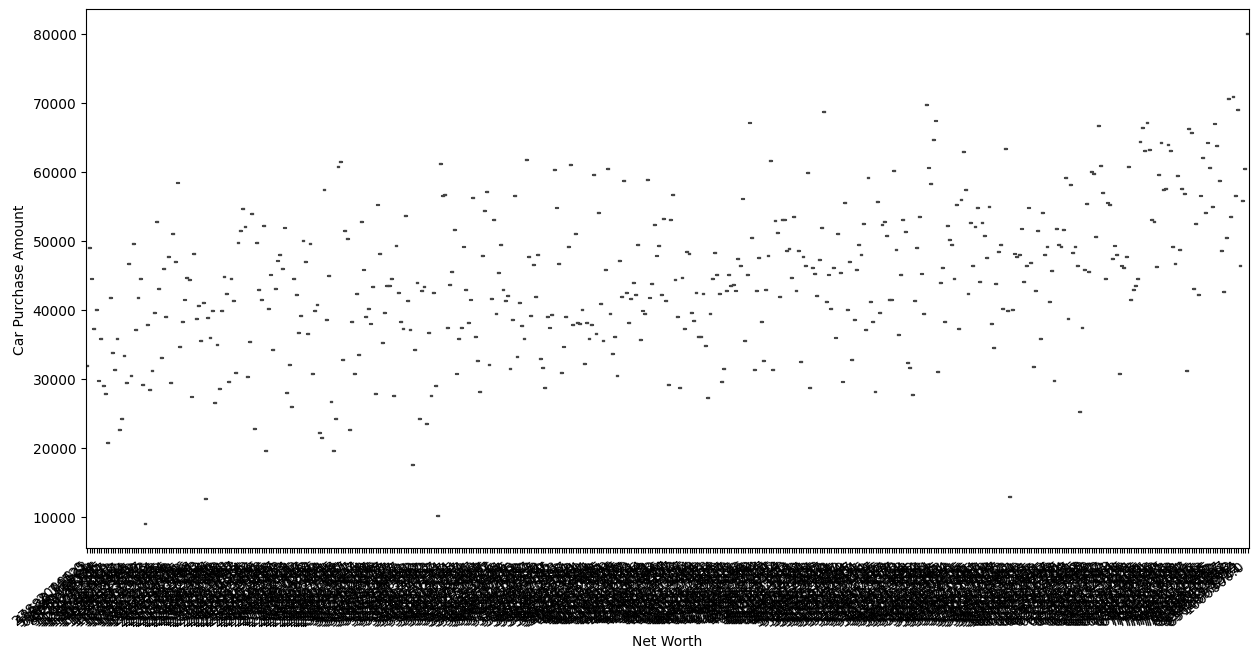

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Net Worth',y='Car Purchase Amount',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

                    0         1              2                 3          4
features       Gender       Age  Annual Salary  Credit Card Debt  Net Worth
amount_corr -0.066408  0.633273       0.617862          0.028882    0.48858


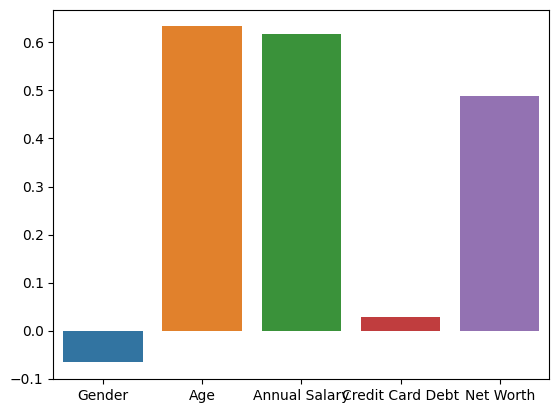

In [ ]:
#visualize the data
import seaborn as sns 
cor=df.corr()
amount_corr=cor['Car Purchase Amount'].to_list()[1:-1]
features=['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']
data = {'features':features, 'amount_corr':amount_corr}
cor_df = pd.DataFrame.from_dict(data, orient='index')##//解决数组长度不一报错的问题
print (cor_df)
##sns.barplot (x="features", y="amount_corr", data=cor_df)## 报错因为feature和amount_corr是两个数组不是字段名，所以不能用引号括起来
sns.barplot (x=features, y=amount_corr, data=cor_df)
plt.show(block=True)


In [ ]:
'''
Author: Bright NZ 109766140@qq.com
Date: 2022-08-24 13:36:27
LastEditors: Bright NZ 109766140@qq.com
LastEditTime: 2022-09-03 15:25:03
FilePath: \undefinedd:\Level6Term3\PROJECT3\project3\CarPricePrediction.ipynb
Description: 这是默认设置,请设置`customMade`, 打开koroFileHeader查看配置 进行设置: https://github.com/OBKoro1/koro1FileHeader/wiki/%E9%85%8D%E7%BD%AE
'''
# matplot data model
from re import X


X=df.drop(['','Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
y=df["Car Purchase Amount"]
X.info()
print("_____________________")
y.info()
print("_____________________")

X



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 146-147: truncated \uXXXX escape (3030066968.py, line 8)

In [ ]:

y.shape

(500,)

In [ ]:
### Applying Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [ ]:
#线性回归测试
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:

#Creating a column transformer to transform categorical columns
ohe=OneHotEncoder()
ohe.fit(X[["Gender","Age","Annual Salary","Credit Card Debt", "Net Worth"]])        

OneHotEncoder()

In [ ]:

from sklearn.compose import make_column_transformer

column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Gender','Age','Annual Salary','Credit Card Debt','Net Worth']),
                                    remainder='passthrough')


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)
lr=LinearRegression()
#### Making a pipeline
pipe=make_pipeline(column_trans,lr)
#### Fitting the  model
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
#### Checking R2 Score
r2_score(y_test,y_pred)
#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
np.argmax(scores)
scores[np.argmax(scores)]
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array([0,50,120000,50000,700000]).reshape(1,5)))
#### The best model is found at a certain random state 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)



ValueError: Shape of passed values is (1, 5), indices imply (1, 6)

In [ ]:
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))
pipe.predict(pd.DataFrame(columns=['Gender','Age','Annual Salary','Credit Card Debt','Net Worth'],data=np.array([0,50,120000,50000,700000]).reshape(1,5)))
pipe.steps[0][1].transformers[0][1].categories[0]

ValueError: columns are missing: {'Unnamed: 0'}

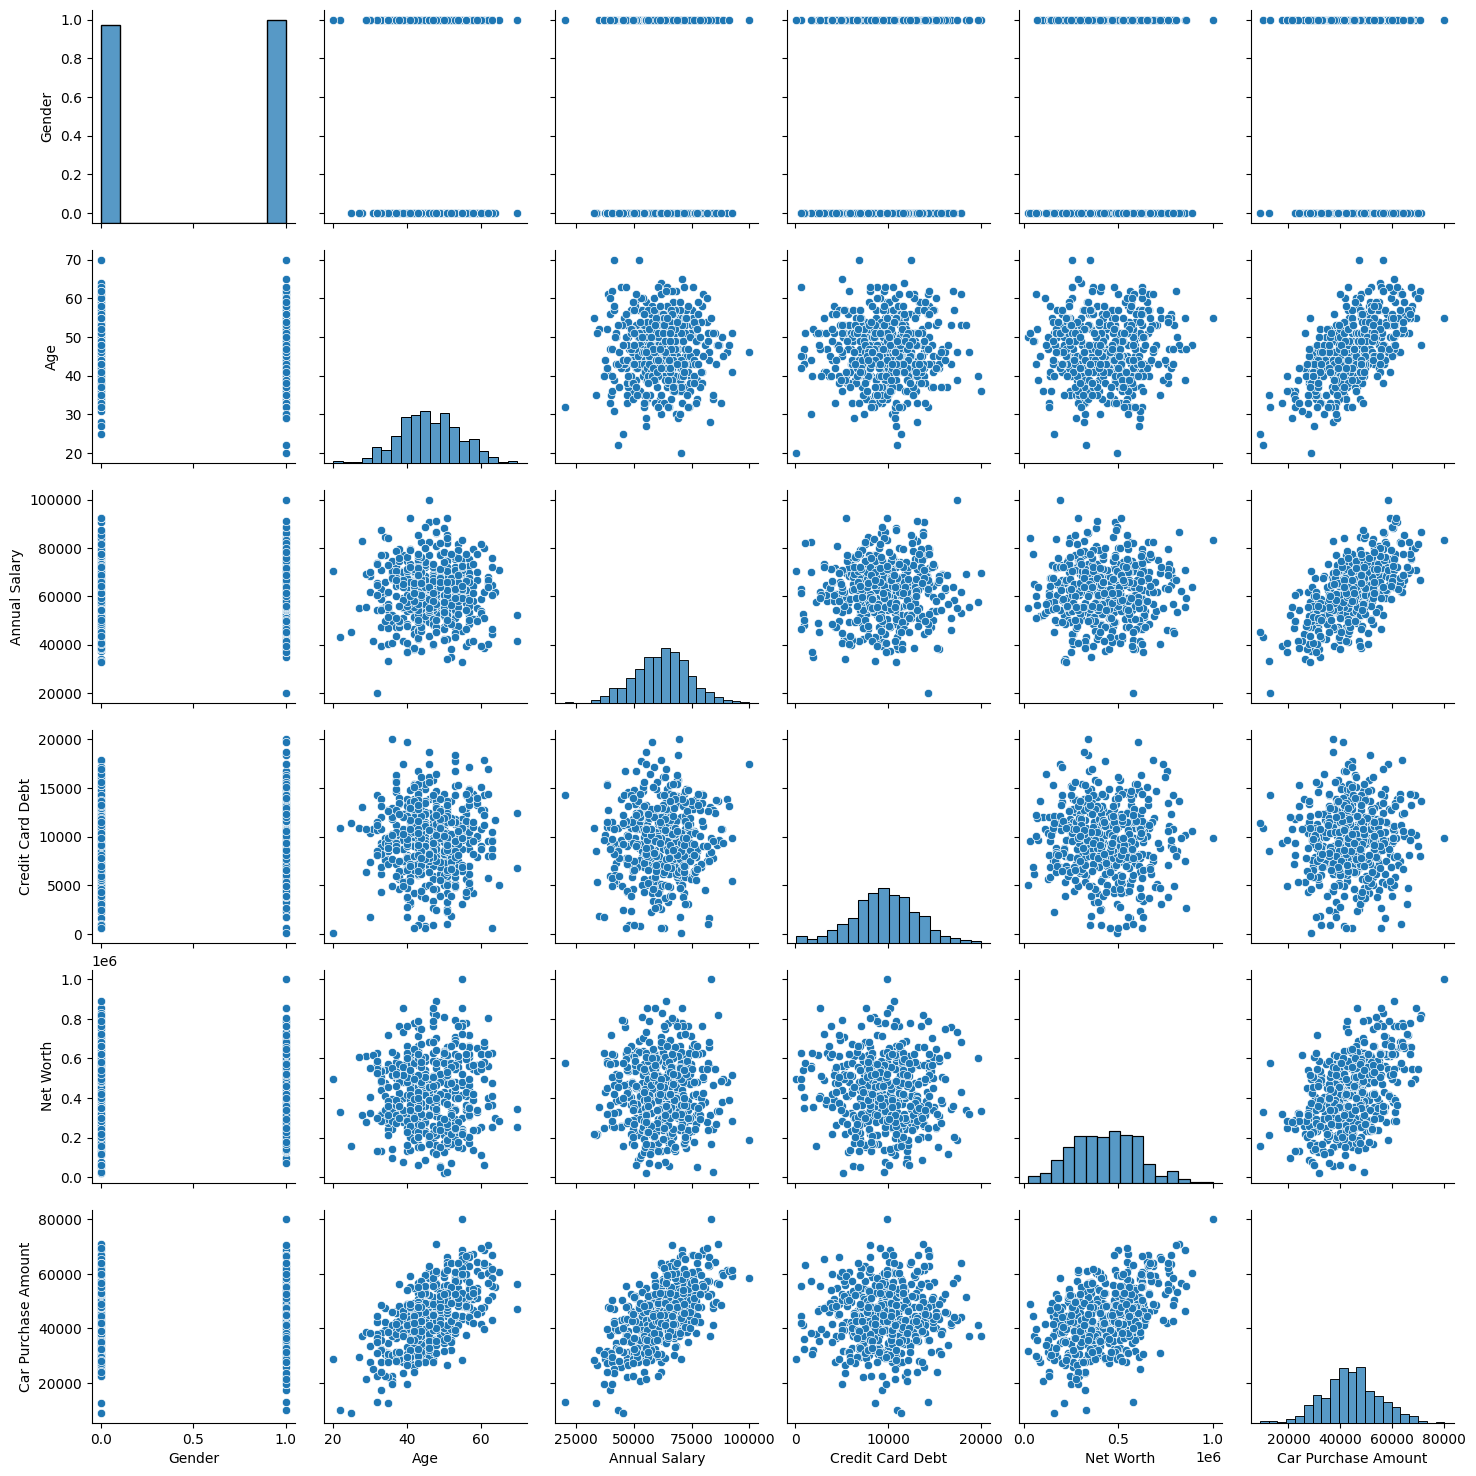

In [ ]:
#plot data
import seaborn as sns
sns.pairplot(df)
plt.show(block=True)#Create input dataset from data


In [ ]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
#Create input dataset from data
inputs = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
#Show Input Data
print(inputs)
print ("The input data shape =",inputs.shape)


     Gender  Age  Annual Salary  Credit Card Debt    Net Worth
0         0   42    62812.09301      11609.380910  238961.2505
1         0   41    66646.89292       9572.957136  530973.9078
2         1   43    53798.55112      11160.355060  638467.1773
3         1   58    79370.03798      14426.164850  548599.0524
4         1   57    59729.15130       5358.712177  560304.0671
..      ...  ...            ...               ...          ...
495       0   41    71942.40291       6995.902524  541670.1016
496       1   38    56039.49793      12301.456790  360419.0988
497       1   54    68888.77805      10611.606860  764531.3203
498       1   59    49811.99062      14013.034510  337826.6382
499       1   47    61370.67766       9391.341628  462946.4924

[500 rows x 5 columns]
The out put data shape = (500, 5)


In [ ]:
#Create output dataset from data
output = df['Car Purchase Amount']
#Show Output Data
print(output)

#Transform Output
output = output.values.reshape(-1,1)

#Show Output Transformed Shape
print("Output Data Shape=",output.shape)

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64
Output Data Shape= (500, 1)


In [ ]:
#Scale input dataset. This is to transform the dataset to a percentage based weighted value between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler_in = MinMaxScaler()
input_scaled = scaler_in.fit_transform(inputs)
print(input_scaled)

[[0.         0.44       0.53515116 0.57836085 0.22342985]
 [0.         0.42       0.58308616 0.476028   0.52140195]
 [1.         0.46       0.42248189 0.55579674 0.63108896]
 ...
 [1.         0.68       0.61110973 0.52822145 0.75972584]
 [1.         0.78       0.37264988 0.69914746 0.3243129 ]
 [1.         0.54       0.51713347 0.46690159 0.45198622]]


In [ ]:
#Scale output.This is to transform the dataset to a percentage based weighted value between 0 and
scaler_out = MinMaxScaler()
output_scaled = scaler_out.fit_transform(output)
print(output_scaled)

[[0.37072477]
 [0.50866938]
 [0.47782689]
 [0.82285018]
 [0.66078116]
 [0.67059152]
 [0.28064374]
 [0.54133778]
 [0.54948752]
 [0.4111198 ]
 [0.70486638]
 [0.46885649]
 [0.27746526]
 [0.56702642]
 [0.57056385]
 [0.61996151]
 [0.46217916]
 [0.49157341]
 [0.50188722]
 [0.64545808]
 [0.59339372]
 [0.48453965]
 [0.53860366]
 [0.53007738]
 [0.50814651]
 [0.49841668]
 [0.3966416 ]
 [0.56467566]
 [0.6950749 ]
 [0.49287831]
 [0.12090943]
 [0.50211776]
 [0.80794216]
 [0.62661214]
 [0.43394857]
 [0.60017103]
 [0.42223485]
 [0.01538345]
 [0.37927499]
 [0.64539707]
 [0.51838974]
 [0.45869677]
 [0.26804521]
 [0.2650104 ]
 [0.84054134]
 [0.84401542]
 [0.35515157]
 [0.406246  ]
 [0.40680623]
 [0.55963883]
 [0.2561583 ]
 [0.77096325]
 [0.55305289]
 [0.5264948 ]
 [0.3236476 ]
 [0.55070832]
 [0.54057623]
 [0.45669016]
 [0.41053254]
 [0.33433524]
 [0.39926954]
 [0.5420261 ]
 [0.57366948]
 [0.43793831]
 [0.46897896]
 [0.61908354]
 [0.55076214]
 [0.48846357]
 [0.61560519]
 [0.56891394]
 [0.30761974]
 [0.56

In [ ]:
df.select_dtypes(include=["object"]).describe()


,Customer Name,Customer e-mail,Country
count,500,500,500
unique,498,500,1
top,Seth,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA
freq,2,1,500


In [ ]:
'''
Author: Bright NZ 109766140@qq.com
Date: 2022-08-24 13:36:27
LastEditors: Bright NZ 109766140@qq.com
LastEditTime: 2022-08-29 22:15:02
FilePath: \project3\CarPricePrediction.ipynb
Description: 这是默认设置,请设置`customMade`, 打开koroFileHeader查看配置 进行设置: https://github.com/OBKoro1/koro1FileHeader/wiki/%E9%85%8D%E7%BD%AE
'''
df.select_dtypes(include=["float"]).describe()


,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000
mean,62127.239608,9607.645049,431475.713625,44209.799218
std,11703.378228,3489.187973,173536.756340,10773.178744
min,20000.000000,100.000000,20000.000000,9000.000000
25%,54391.977195,7397.515792,299824.195900,37629.896040
50%,62915.497035,9655.035568,426750.120650,43997.783390
75%,70117.862005,11798.867487,557324.478725,51254.709517
max,100000.000000,20000.000000,1000000.000000,80000.000000


<AxesSubplot:>

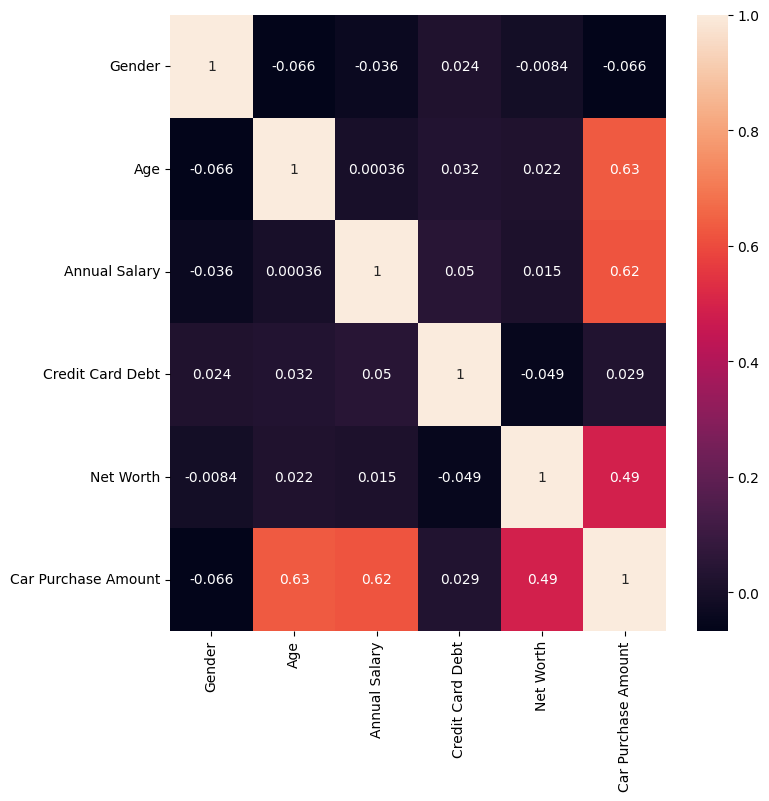

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Create the ANN model. In this case we'll use 5 inputs, 2 hidden layers, 25 neurons per layer, 1 output.
# Packages needed 
from keras import Sequential
from tensorflow import keras
from keras import layers,Sequential,losses,optimizers,datasets
from keras.layers import Dense

#model methods and functions
model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
print ("ANN Model Made as Below: ")
print("---------------------------------------")
print(model.summary())

ANN Model Made as Below: 
---------------------------------------
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 25)                150       
                                                                 
 dense_16 (Dense)            (None, 25)                650       
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Train model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
epochs_hist = model.fit(input_scaled, output_scaled, epochs=20, batch_size=10, verbose=1, validation_split=0.2)

#print dictionary keys
print("The history keys is :")
print(epochs_hist.history.keys())

Epoch 1/20
40/40 [==============================] - 1s 6ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 9.7323e-04 - val_loss: 0.0012
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 6.9860e-04 - val_loss: 9.4233e-04
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 6.2619e-04 - val_loss: 7.2352e-04
Epoch 5/20
40/40 [==============================] - 0s 7ms/step - loss: 4.4816e-04 - val_loss: 5.3587e-04
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 3.5188e-04 - val_loss: 4.2476e-04
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 2.7583e-04 - val_loss: 3.5915e-04
Epoch 8/20
40/40 [==============================] - 0s 3ms/step - loss: 2.4263e-04 - val_loss: 2.9803e-04
Epoch 9/20
40/40 [==============================] - 0s 3ms/step - loss: 1.7506e-04 - val_loss: 2.0060e-04
Epoch 10/20
40/40 [==============================] - 0s 3m

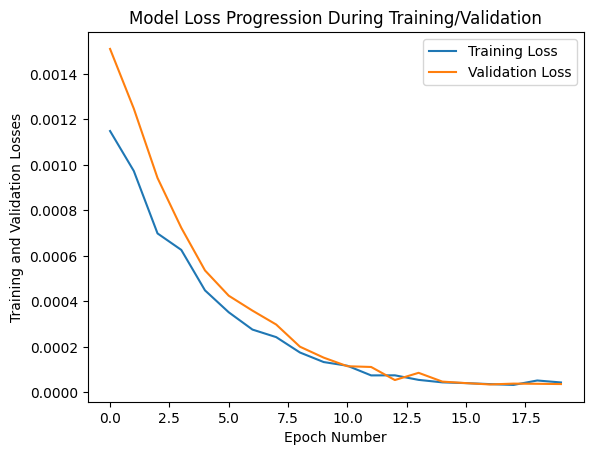

In [ ]:
#Plot the training graph to see how quickly the model learns

# print("The training graph plotted is:")
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show(block=True)


In [ ]:
# Evaluate model
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth 
# ***(Note that input data must be normalized)***​
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from tensorflow import keras
from keras import layers,Sequential,losses,optimizers,datasets
from keras.layers import Dense
import statsmodels.api as sm
import tensorflow.python.keras
from sklearn.model_selection import train_test_split

df = pd.read_csv('Car_Purchasing_Data.csv')
inputs = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
output = df['Car Purchase Amount']
output = output.values.reshape(-1,1)
scaler_in = MinMaxScaler()
input_scaled = scaler_in.fit_transform(inputs)
scaler_out = MinMaxScaler()
output_scaled = scaler_out.fit_transform(output)
   
#split data
inputs_train, inputs_test,output_train, output_test=train_test_split( input_scaled, output_scaled, test_size=0.2)
   

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

epochs_hist = model.fit(input_scaled, output_scaled, epochs=20, batch_size=20, verbose=1, validation_split=0.2)
#input_test_sample1 = np.array([[1, 46.73, 61370.67, 9391.34, 462946.49]])#0	28	50000	3000	47000	28000
input_test_sample1 = np.array([[0,28,50000,3000,47000]])

#Scale input test sample data
input_test_sample_scaled = scaler_in.transform(input_test_sample1)
#Predict output
output_predict_sample_scaled = model.predict(input_test_sample_scaled)
print ("The first training model given the the first optimizing data likes below: ")
print ("----------------------------------------------------------------------------- ")
#Print predicted output
print('Predicted Output (Scaled) =', output_predict_sample_scaled)
#Unscaled output
output_predict_sample = scaler_out.inverse_transform(output_predict_sample_scaled)
MSE=mean_squared_error(output, output_predict_sample )
print('Predicted Output / Purchase Amount ', output_predict_sample)
print( output,  output_predict_sample)
print("The ErrorRate is:", MSE )

epochs_hist = model.fit(input_scaled, output_scaled, epochs=20, batch_size=10, verbose=1, validation_split=0.2)
#input_test_sample2 = np.array([[0,42,62812.09,11609.38, 35321.45]]) #1	35	70000	10000	60000	48000
input_test_sample2 = np.array([[1,35,70000,10000,60000]])
#Scale input test sample data
input_test_sample_scaled = scaler_in.transform(input_test_sample2)
#Predict output
output_predict_sample_scaled = model.predict(input_test_sample_scaled)
print ("The second training model given the the first optimizing data likes below: ")
print ("----------------------------------------------------------------------------- ")
#Print predicted output
print('Predicted Output (Scaled) =', output_predict_sample_scaled)
#Unscaled output
output_predict_sample = scaler_out.inverse_transform(output_predict_sample_scaled)

MSE=mean_squared_error(output, output_predict_sample )
print('Predicted Output / Purchase Amount ', output_predict_sample)
print( output,  output_predict_sample)
print("The ErrorRate is:", MSE )

epochs_hist = model.fit(input_scaled, output_scaled, epochs=20, batch_size=10, verbose=1, validation_split=0.2)
#input_test_sample3 = np.array([[0, 41.8,  62812.09, 11609.38, 238961.25]])#0	45	90000	20000	70000	58000

input_test_sample3 = np.array([[0,45,90000,20000,70000]])
#Scale input test sample data
input_test_sample_scaled = scaler_in.transform(input_test_sample3)
#Predict output
output_predict_sample_scaled = model.predict(input_test_sample_scaled)
print ("The third training model given the the first optimizing data likes below: ")
print ("----------------------------------------------------------------------------- ")
#Print predicted output
print('Predicted Output (Scaled) =', output_predict_sample_scaled)
#Unscaled output
output_predict_sample = scaler_out.inverse_transform(output_predict_sample_scaled)

MSE=mean_squared_error(output, output_predict_sample )
print('Predicted Output / Purchase Amount ', output_predict_sample)
print( output,  output_predict_sample)
print("The ErrorRate is:", MSE )

epochs_hist = model.fit(input_scaled, output_scaled, epochs=20, batch_size=10, verbose=1, validation_split=0.2)
#input_test_sample3 = np.array([[0, 41.8,  62812.09, 11609.38, 238961.25]])#1	43	53457.10132	12884.07868	476643.3544	38189.50601

input_test_sample3 = np.array([[1,43,53457,12884,476643]])
#Scale input test sample data
input_test_sample_scaled = scaler_in.transform(input_test_sample3)#在构造训练模型处理数据时需要进行fit_transform, 将数据归一化和标准化处理成0到1的值
#Predict output                                                   #但是在测试数据时就不需要再把测试样本做fit_transform处理。只需要变成0到1的值就可以了。
            
output_predict_sample_scaled = model.predict(input_test_sample_scaled)
print ("The forth training model given the the first optimizing data likes below: ")
print ("----------------------------------------------------------------------------- ")
#Print predicted output
print('Predicted Output (Scaled) =', output_predict_sample_scaled)
#Unscaled output
output_predict_sample = scaler_out.inverse_transform(output_predict_sample_scaled)


print('Predicted Output / Purchase Amount ', output_predict_sample)
print( output,  output_predict_sample)
print("The ErrorRate is:", MSE )

epochs_hist = model.fit(input_scaled, output_scaled, epochs=20, batch_size=10, verbose=1, validation_split=0.2)
#input_test_sample3 = np.array([[0, 41.8,  62812.09, 11609.38, 238961.25]])#1	50	73348.70745	8270.707359	612738.6171	59045.51309

input_test_sample3 = np.array([[1,50,73348,8270,612738]])
#Scale input test sample data
input_test_sample_scaled = scaler_in.transform(input_test_sample3)
#Predict output
output_predict_sample_scaled = model.predict(input_test_sample_scaled)
print ("The fifth training model given the the first optimizing data likes below: ")
print ("----------------------------------------------------------------------------- ")
#Print predicted output
print('Predicted Output (Scaled) =', output_predict_sample_scaled)
#Unscaled output
output_predict_sample = scaler_out.inverse_transform(output_predict_sample_scaled)
output_predict_sample  = output_predict_sample .values.reshape(-1,1)
output.shape 
output_predict_sample.shape
MSE=mean_squared_error(output, output_predict_sample )
print('Predicted Output / Purchase Amount ', output_predict_sample)
print( output,  output_predict_sample)
print("The ErrorRate is:",MSE )

Epoch 1/20
20/20 [==============================] - 2s 23ms/step - loss: 0.1706 - val_loss: 0.0695
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0380 - val_loss: 0.0251
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0161 - val_loss: 0.0117
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0053
Epoch 8/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 9/20
20/20 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 10/20
20/20 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 11/20
20/20 

d:\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
The first training model given the the first optimizing data likes below: 
----------------------------------------------------------------------------- 
Predicted Output (Scaled) = [[0.23492865]]


ValueError: Found input variables with inconsistent numbers of samples: [500, 1]

!pip3 import install ann_visualizer

In [ ]:
'''
Author: Bright NZ 109766140@qq.com
Date: 2022-08-24 13:36:27
LastEditors: Bright NZ 109766140@qq.com
LastEditTime: 2022-08-27 20:42:06
FilePath: \project3\CarPricePrediction.ipynb
Description: 这是默认设置,请设置`customMade`, 打开koroFileHeader查看配置 进行设置: https://github.com/OBKoro1/koro1FileHeader/wiki/%E9%85%8D%E7%BD%AE
'''

from random import uniform
import keras
import graphviz 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import Sequential
from tensorflow import keras
from keras import layers, Sequential, losses, optimizers, datasets
import tensorflow

from tensorflow import keras
from keras.layers.core import Activation, Dense

from ann_visualizer import ann_viz
import statsmodels.api as sm
import tensorflow.python.keras
from sklearn.model_selection import train_test_split

# get data

df = pd.read_csv('Car_Purchasing_Data.csv')

inputs = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
output = df['Car Purchase Amount']
output = output.values.reshape(-1,1)

scaler_in = MinMaxScaler()
input_scaled = scaler_in.fit_transform(inputs)
scaler_out = MinMaxScaler()
output_scaled = scaler_out.fit_transform(output)

#Split data

input_train_sample, input_test_sample, output_train_sample, output_test_sample=train_test_split(input_scaled,output_scaled,train_size=0.2 )


# training data 
model = Sequential()  #Create model layer (层次模型)
#model.add(Dense(16,input_dim=5)) #Input layer(输入层，Dense表示BP层)
#model.add(Activation('relu'))  #Active function(添加激活函数)
#model.add(Dense(4)) #Middle layer(中间层)
#model.add(Activation('relu'))  #Active function(添加激活函数)
#model.add(Dense(1))  #Output layer(输出层)
#model.compile(loss='mean_squared_error', optimizer='Adam') #Compile model(编译模型)
#model.fit(input_scaled, output_scaled, epochs = 50, batch_size = 256) #Train Model 50times(训练模型nb_epoch=50次)

###inspect training result
#pre_output=model.predict(inputs)
#pre_output[0], output[0]
#Change the following values:
#•	Number of neurons
#•	Number of hidden layers
#•	Number of epochs
#•	Batch size
#•	Sample input data



model.add(Dense(25,input_dim=5)) #Input layer(输入层，Dense表示BP层)
model.add(Activation('relu'))  #Active function(添加激活函数)
model.add(Dense(25)) #Middle layer(中间层)
model.add(Activation('relu'))  #Active function(添加激活函数)
model.add(Dense(1))  #Output layer(输出层)
model.compile(optimizer='Adam', loss='mean_squared_error', ) #Compile model(编译模型)
ann_viz(model, title="model_test")

model.fit(input_scaled, output_scaled, epochs =50, batch_size =256) #Train Model 50times(训练模型nb_epoch=50次,每组200个)
#checking the result of training (检查训练模型学习的效果)

pre_output=model.predict(inputs)
pre_output[0], output[0]

ImportError: cannot import name 'ann_viz' from 'ann_visualizer' (d:\Python\Python310\lib\site-packages\ann_visualizer\__init__.py)

NameError: name 'model' is not defined

In [ ]:
#The training result is not that idea, but the computer CPU is not that enough to run over 1000 times training.
#The training trend is right. because it is keeping closing to 0.

In [ ]:
#display the graphic of training result



import matplotlib
import matplotlib.pyplot as plt
from random import uniform
import keras
import graphviz 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras import Sequential
from tensorflow import keras
from keras import layers, Sequential, losses, optimizers, datasets
import tensorflow
import ann_visualizer
from  ann_visualizer.visualize import ann_viz

from keras.layers.core import Activation, Dense
import statsmodels.api as sm
import tensorflow.python.keras
from sklearn.model_selection import train_test_split


df = pd.read_csv('Car_Purchasing_Data.csv')
inputs = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
output = df['Car Purchase Amount']
output = output.values.reshape(-1,1)
scaler_in = MinMaxScaler()
input_scaled = scaler_in.fit_transform(inputs)
scaler_out = MinMaxScaler()
output_scaled = scaler_out.fit_transform(output)

input_scaled_train, input_scaled_test, output_scaled_train, output_scaled_test=train_test_split(input_scaled, output_scaled, train_size=0.2 )
model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
pre_output=model.predict(input)
plt.scatter( inputs, output, color="red")
plt.plot(inputs, pre_output)

ValueError: Failed to find data adapter that can handle input: <class 'method'>, <class 'NoneType'>

In [ ]:
# Evaluate model
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth 
# ***(Note that input data must be normalized)***

input_test_sample = np.array([[0, 41.8,  62812.09, 11609.38, 238961.25]])
#input_test_sample2 = np.array([[1, 46.73, 61370.67, 9391.34, 462946.49]])

#Scale input test sample data
input_test_sample_scaled = scaler_in.transform(input_test_sample)

#Predict output
output_predict_sample_scaled = model.predict(input_test_sample_scaled)

#Print predicted output
print('Predicted Output (Scaled) =', output_predict_sample_scaled)

#Unscale output
output_predict_sample = scaler_out.inverse_transform(output_predict_sample_scaled)
print('Predicted Output / Purchase Amount ', output_predict_sample)

d:\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 258ms/step
Predicted Output (Scaled) = [[-0.13406137]]
Predicted Output / Purchase Amount  [[-518.357]]


In [ ]:
   
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import layers,losses,optimizers,datasets
from keras.layers import Dense
from keras import Sequential
import tensorflow.python.keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import ann_visualizer
from  ann_visualizer.visualize import ann_viz
   
#import data
df = pd.read_csv('cleanData.csv', encoding='ISO-8859-1')
inputs = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
output = df['Car Purchase Amount']
output = output.values.reshape(-1,1)
scaler_in = MinMaxScaler()
input_scaled = scaler_in.fit_transform(inputs)
scaler_out = MinMaxScaler()
output_scaled = scaler_out.fit_transform(output)
   
   #split data
inputs_train,inputs_test,output_train,output_test=train_test_split( input_scaled, output_scaled, test_size=0.2)
   
   
   
   #model data/create ANN model
model = Sequential()#使用Sequential model 
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
   
   # train data
model.compile(optimizer = 'Adam', loss = 'mean_squared_error' ,metrics=['accuracy'] )#配置网络环境，优化器选择Adam，损失函数选择MSE，
ann_viz(model, title="model_test");  
epochs_hist = model.fit(inputs_train, output_train, epochs=20, batch_size=10, verbose=1, validation_split=0.2)
input_test_sample1 = np.array([[1, 46.73, 61370.67, 9391.34, 462946.49]])#0	28	50000	3000	47000	28000


   #Scale input test sample data
input_test_sample_scaled = scaler_in.transform(input_test_sample1)
   #Predict output
output_predict_sample_scaled = model.predict(input_test_sample_scaled)
print ("The first training model given the the first optimizing data likes below: ")
print ("----------------------------------------------------------------------------- ")
   #Print predicted output
print('Predicted Output (Scaled) =', output_predict_sample_scaled)
   #Unscaled output
output_predict_sample = scaler_out.inverse_transform(output_predict_sample_scaled)

Error: Could not open "network.gv.pdf" for writing : Permission denied


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpdf', '-O', 'network.gv']' returned non-zero exit status 1. [stderr: b'Error: Could not open "network.gv.pdf" for writing : Permission denied\r\n']

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import layers,losses,optimizers,datasets
from keras.layers import Dense
from keras import Sequential
import tensorflow.python.keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import ann_visualizer
from  ann_visualizer.visualize import ann_viz
   
#import data
df = pd.read_csv('cleanData.csv', encoding='ISO-8859-1')
inputs = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
output = df['Car Purchase Amount']
output = output.values.reshape(-1,1)
scaler_in = MinMaxScaler()
input_scaled = scaler_in.fit_transform(inputs)
scaler_out = MinMaxScaler()
output_scaled = scaler_out.fit_transform(output)
   
#split data
inputs_train,inputs_test,output_train,output_test=train_test_split( input_scaled, output_scaled, test_size=0.2)
    
   
#model data/create ANN model
model = Sequential()#使用Sequential model 
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

# train data
model.compile(optimizer = 'Adam', loss = 'mean_squared_error' ,metrics=['accuracy'] )#配置网络环境，优化器选择Adam，损失函数选择MSE，
ann_viz(model, title="network7.gv")
epochs_hist = model.fit(inputs_train, output_train, epochs=20, batch_size=10, verbose=1, validation_split=0.2)
input_test_sample1 = np.array([[1, 46.73, 61370.67, 9391.34, 462946.49]])#0	28	50000	3000	47000	28000


   #Scale input test sample data
input_test_sample_scaled = scaler_in.transform(input_test_sample1)
   #Predict output
output_predict_sample_scaled = model.predict(input_test_sample_scaled)
print ("The first training model given the the first optimizing data likes below: ")
print ("----------------------------------------------------------------------------- ")
   #Print predicted output
print('Predicted Output (Scaled) =', output_predict_sample_scaled)
   #Unscaled output
output_predict_sample = scaler_out.inverse_transform(output_predict_sample_scaled)

Error: Could not open "network.gv.pdf" for writing : Permission denied


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpdf', '-O', 'network.gv']' returned non-zero exit status 1. [stderr: b'Error: Could not open "network.gv.pdf" for writing : Permission denied\r\n']